In [ ]:
#importing all the necessary libraries
%matplotlib inline
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import pandas as pd
import seaborn as sns
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils


# Load libraries
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
% matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math


***Pre-processing & data cleaning***

In [ ]:
!pip install pyproj==1.9.6

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     |████████████████████████████████| 2.8MB 30.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702423 sha256=f2656a9a1efa50ba973d656b4f667dd768d271e08505f3e4df21c40ac5d6be9b
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     | 149

In [ ]:
df1 = pd.read_excel('/content/sample_data/D-1  POPULATION CLASSIFIED BY PLACE OF BIRTH AND SEX - 2011 (2).XLSX')
df2 = pd.read_excel('/content/sample_data/D-1  POPULATION CLASSIFIED BY PLACE OF BIRTH AND SEX - 2011.XLSX')
df3 = pd.read_excel('/content/sample_data/D-2 MIGRANTS CLASSIFIED BY PLACE OF LAST RESIDENCE, SEX AND DURATION OF RESIDENCE IN THE PLACE OF ENUMERATION - 2011.XLSX')
#df4 = pd.read_excel('/content/sample_data/D-4  MIGRANTS BY PLACE OF LAST RESIDENCE, AGE, SEX, EDUCATIONAL LEVEL AND  DURATION OF RESIDENCE - 2011.XLSX')
df6 = pd.read_excel('/content/sample_data/D-6  MIGRANTS BY PLACE OF LAST RESIDENCE, ECONOMIC ACTIVITY, AGE, SEX AND DURATION OF RESIDENCE - 2011.XLSX')
#df12 = pd.read_excel('/content/sample_data/D-5 MIGRANTS BY PLACE OF LAST RESIDENCE, AGE, SEX, REASON FOR MIGRATION AND DURATION OF RESIDENCE - 2011.XLSX')

'''df4 = pd.read_excel('/content/sample_data/DS-0000-D07-MDDS.XLSX')
df5 = pd.read_excel('/content/sample_data/DS-0000-D10-MDDS.XLSX')
df6 = pd.read_excel('/content/sample_data/DS-0000-D12-MDDS.XLSX')
df7 = pd.read_excel('/content/sample_data/DS-0000-D13-MDDS.XLSX')
'''
#df1.plot()
'''
Data Cleaning and processing
#df1 = df1.drop("Table", axis = 1, inplace = True)
'''
#df1.shape
#df1 = df1.melt('Birth place', var_name='cols',  value_name='vals')
#g = sns.factorplot(x="Birth place", y="vals", hue='cols', data=df1)

'\nData Cleaning and processing\n#df1 = df1.drop("Table", axis = 1, inplace = True)\n'

In [ ]:
df1.head(5)

,State,District,Area Name,Birth place,Total-Persons,Total-Males,Total-Females,Rural-Persons,Rural-Males,Rural-Females,Urban-Persons,Urban-Males,Urban-Females
0,0,0,INDIA,Total Population,1210854977,623270258,587584719,833748852,427781058,405967794,377106125,195489200,181616925
1,0,0,INDIA,Born within India,1205201066,620582802,584618264,831175009,426664183,404510826,374026057,193918619,180107438
2,0,0,INDIA,Within the state of enumeration,1148903503,595735238,553168265,815096974,422199650,392897324,333806529,173535588,160270941
3,0,0,INDIA,Born in the place of enumeration,763567558,480479075,283088483,560572499,364822626,195749873,202995059,115656449,87338610
4,0,0,INDIA,Born elsewhere in the district of enumeration,264108665,77306410,186802255,193992402,45827679,148164723,70116263,31478731,38637532


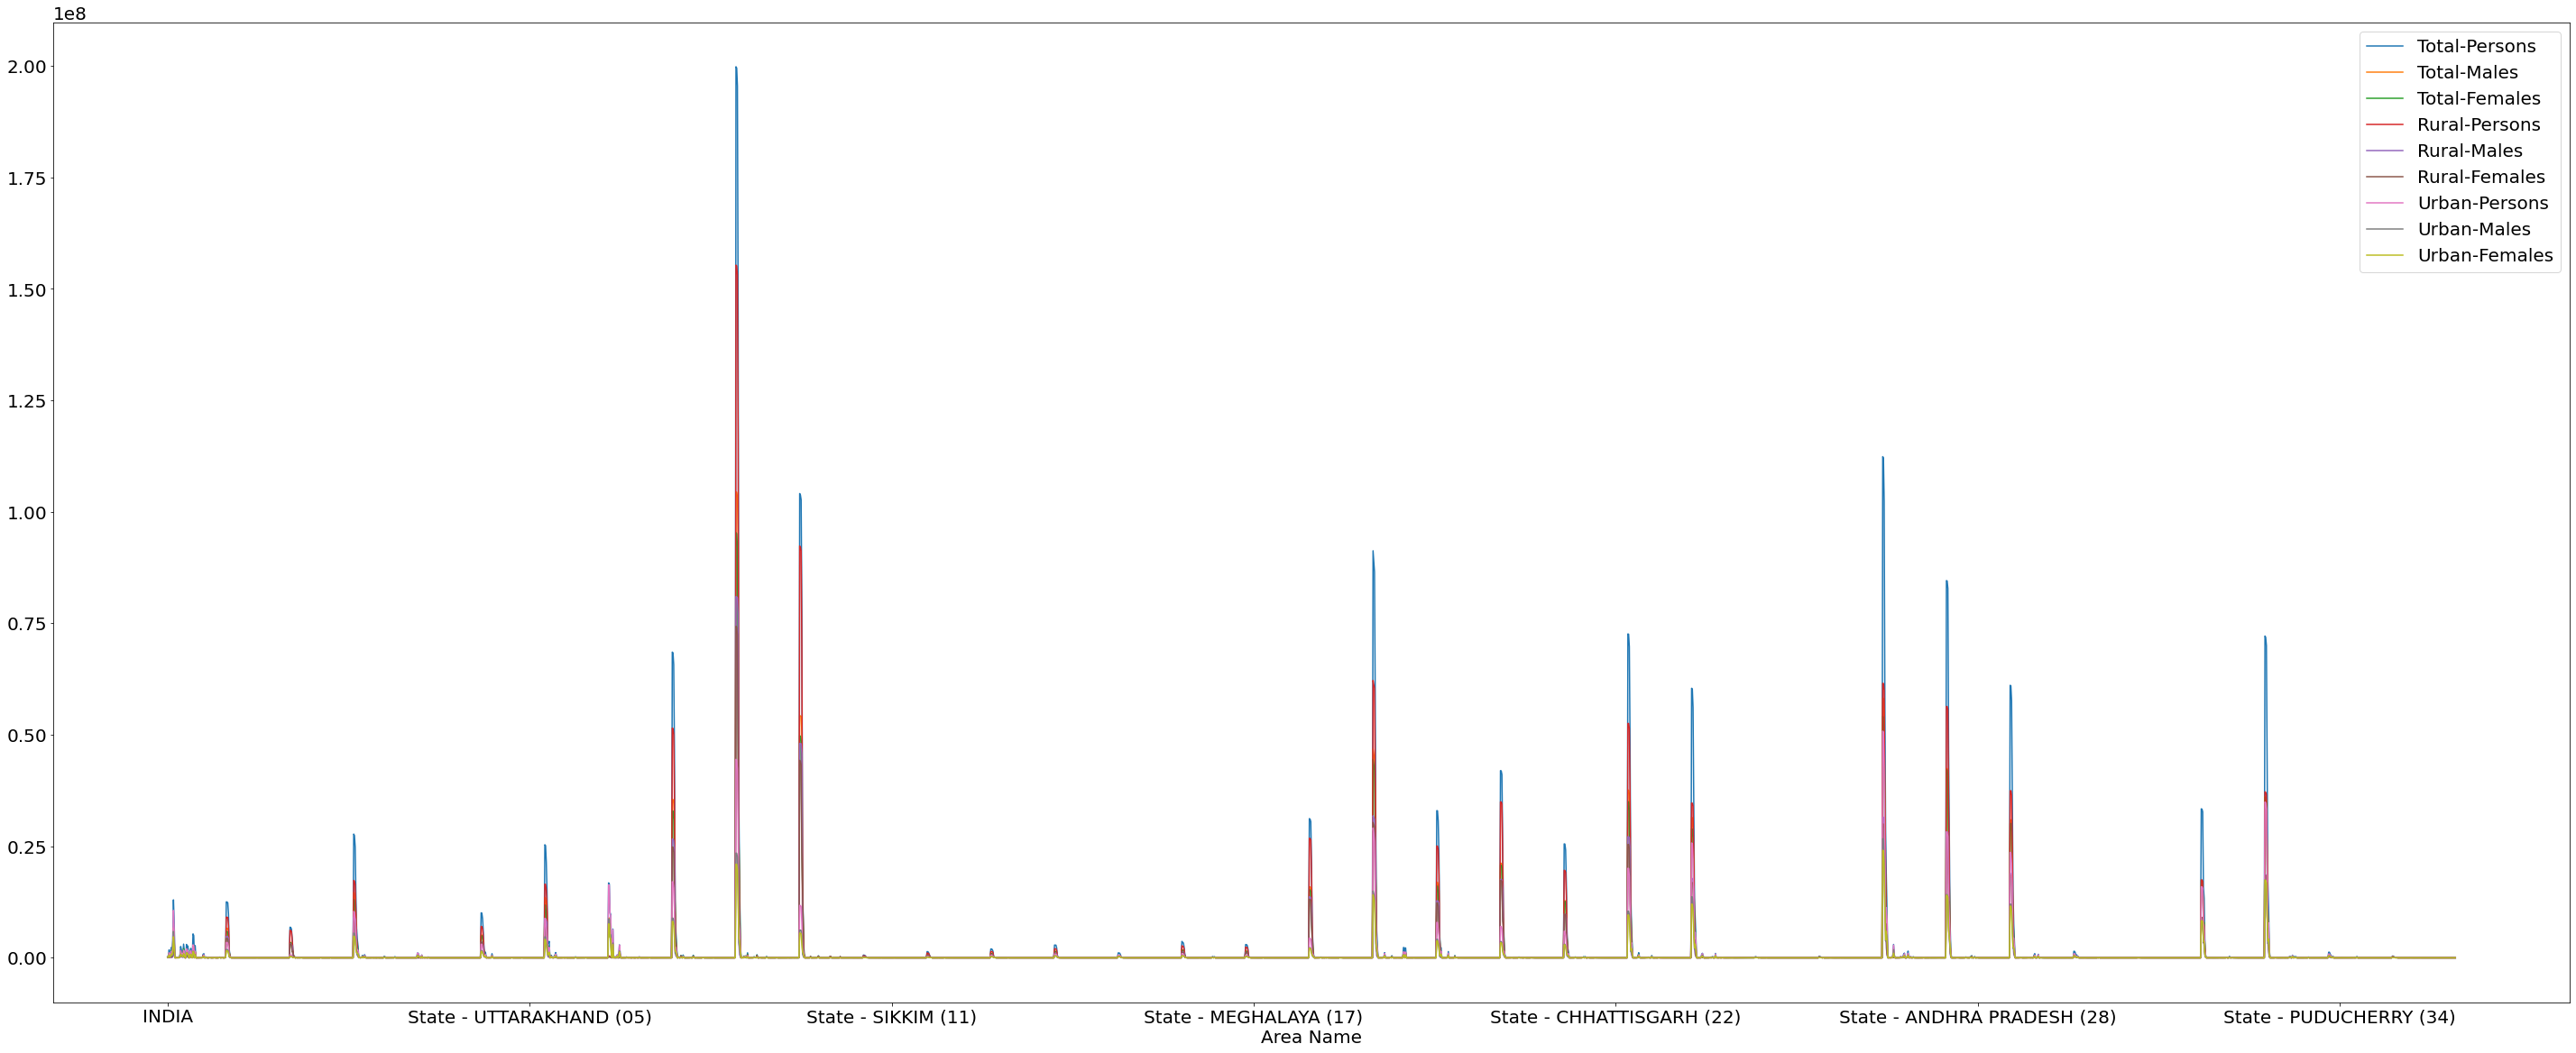

In [ ]:
df1[7:].plot(x="Area Name",y=['Total-Persons','Total-Males','Total-Females', 'Rural-Persons', 'Rural-Males',
       'Rural-Females', 'Urban-Persons', 'Urban-Males', 'Urban-Females'],figsize=(50,20))

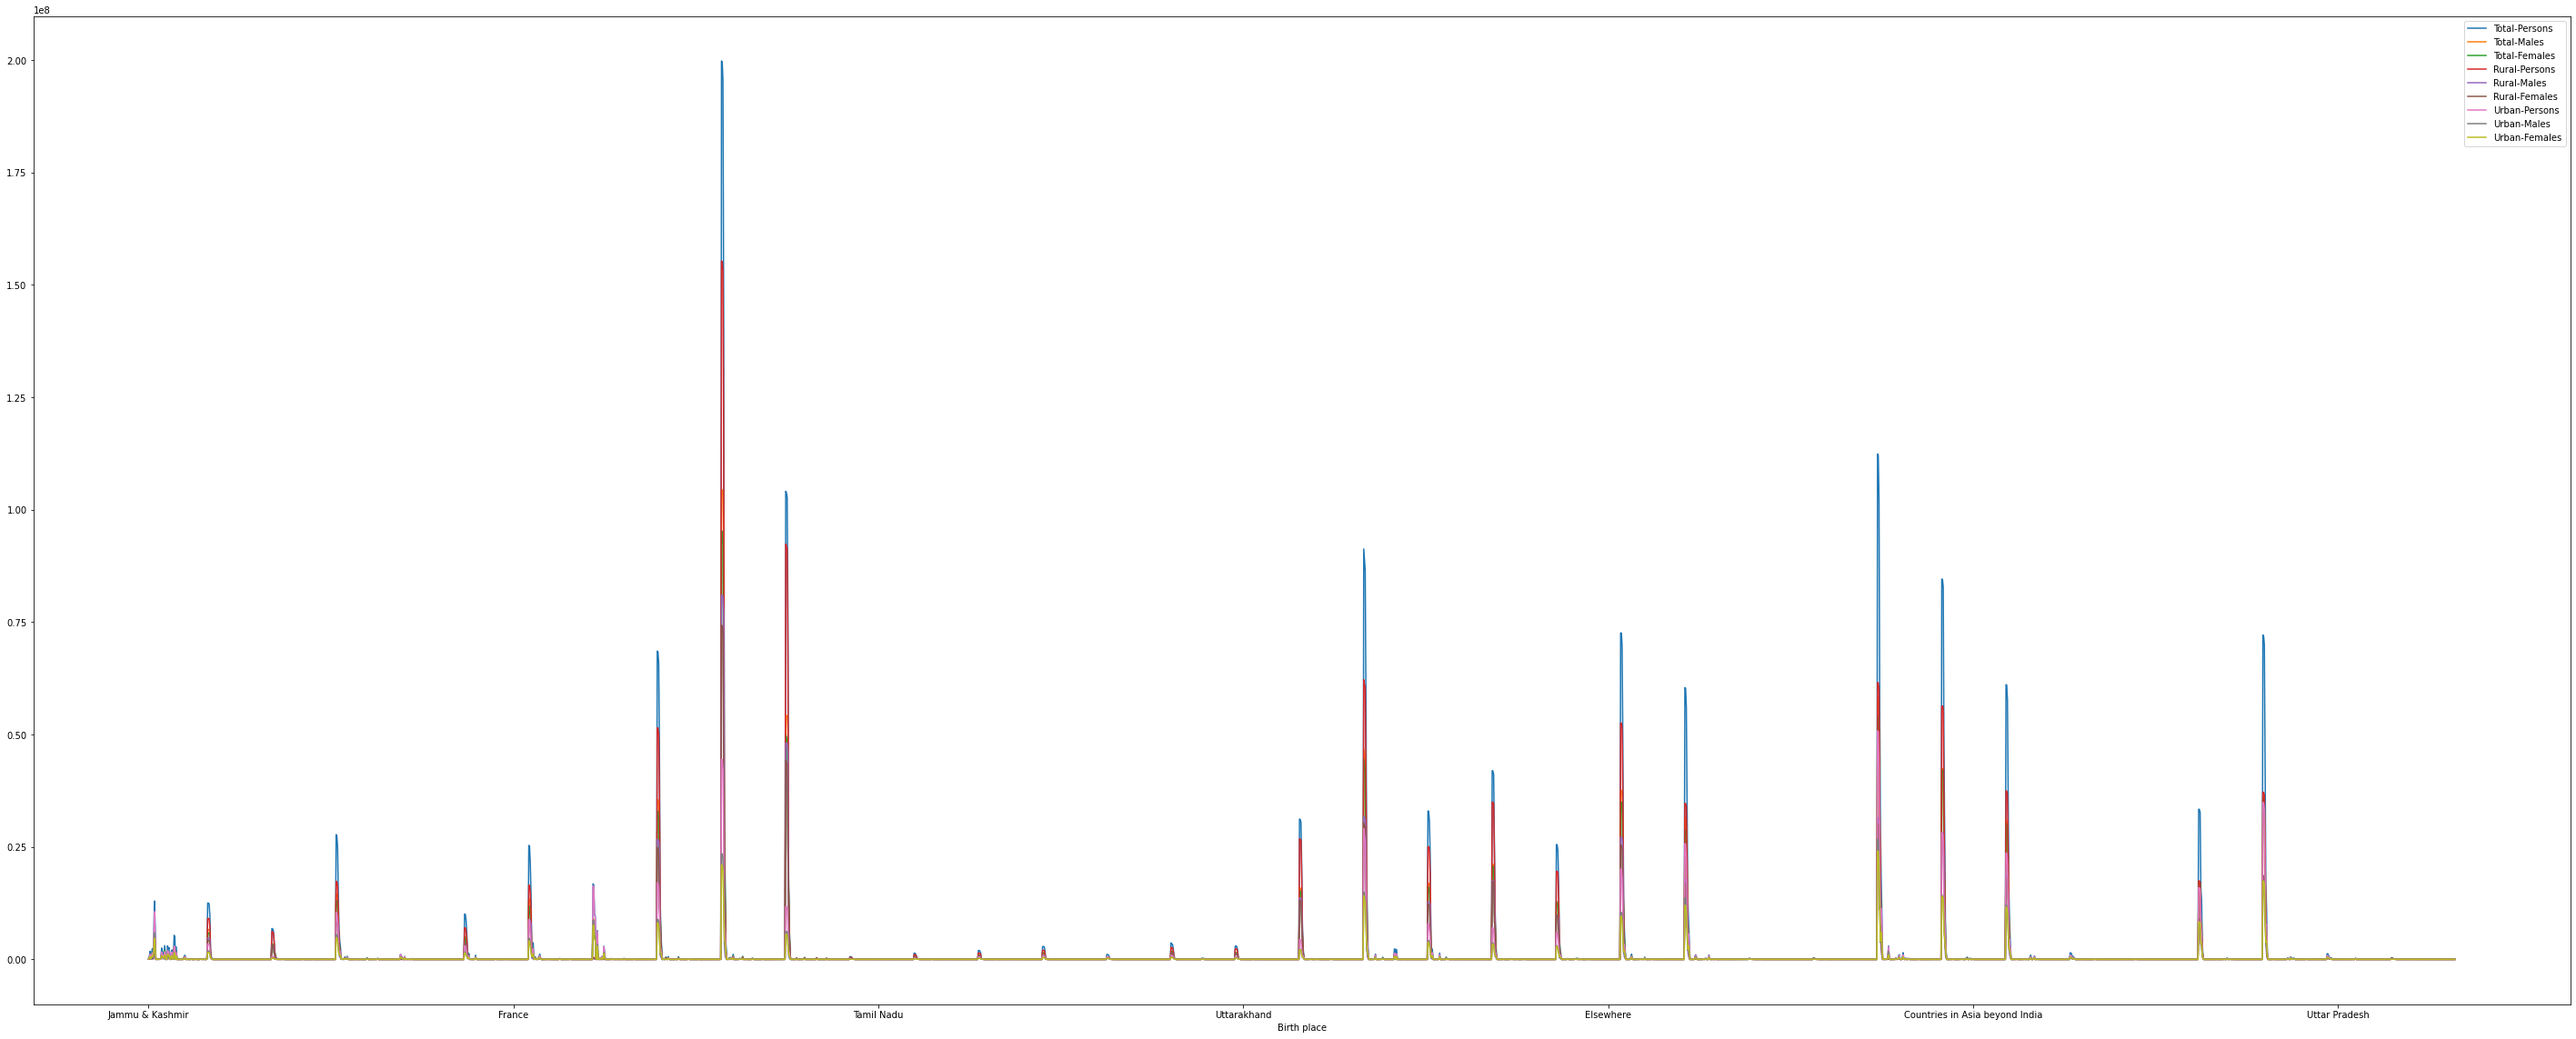

In [ ]:
df1[7:].plot(x="Birth place",y=['Total-Persons','Total-Males','Total-Females', 'Rural-Persons', 'Rural-Males',
       'Rural-Females', 'Urban-Persons', 'Urban-Males', 'Urban-Females'],figsize=(50,20))

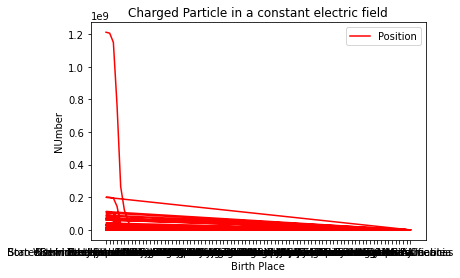

In [ ]:
#matplot
# Plotting both the curves simultaneously
plt.plot(df1["Birth place"], df1["Total-Persons"], color='r', label='Position')
#plt.plot(t_list, v_list, color='g', label='Velocity')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Birth Place")
plt.ylabel("NUmber")
plt.title("Charged Particle in a constant electric field")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
df4.columns

Index(['State', 'District', 'Area Name',
       'Place of enumeration-Total/Rural/Urban', 'Duration of residence',
       'Age -group', 'Last_residence-Total/Rural/Urban', 'Total-Persons',
       'Total-Males', 'Total-Females', 'Illiterate-Persons',
       'Illiterate-Males', 'Illiterate-Females', 'Literate-Persons',
       'Literate-Males', 'Literate-Females',
       'Literate but below Matric/Secondary-Persons',
       'Literate but below Matric/Secondary-Males',
       'Literate but below Matric/Secondary-Females',
       'Matric/Secondary but below graduate-Persons',
       'Matric/Secondary but below graduate-Males',
       'Matric/Secondary but below graduate-Females',
       'Technical diploma or certificate not equal to degree-Persons',
       'Technical diploma or certificate not equal to degree-Males',
       'Technical diploma or certificate not equal to degree-Females',
       'Graduate and above other than technical degree-Persons',
       'Graduate and above other than te

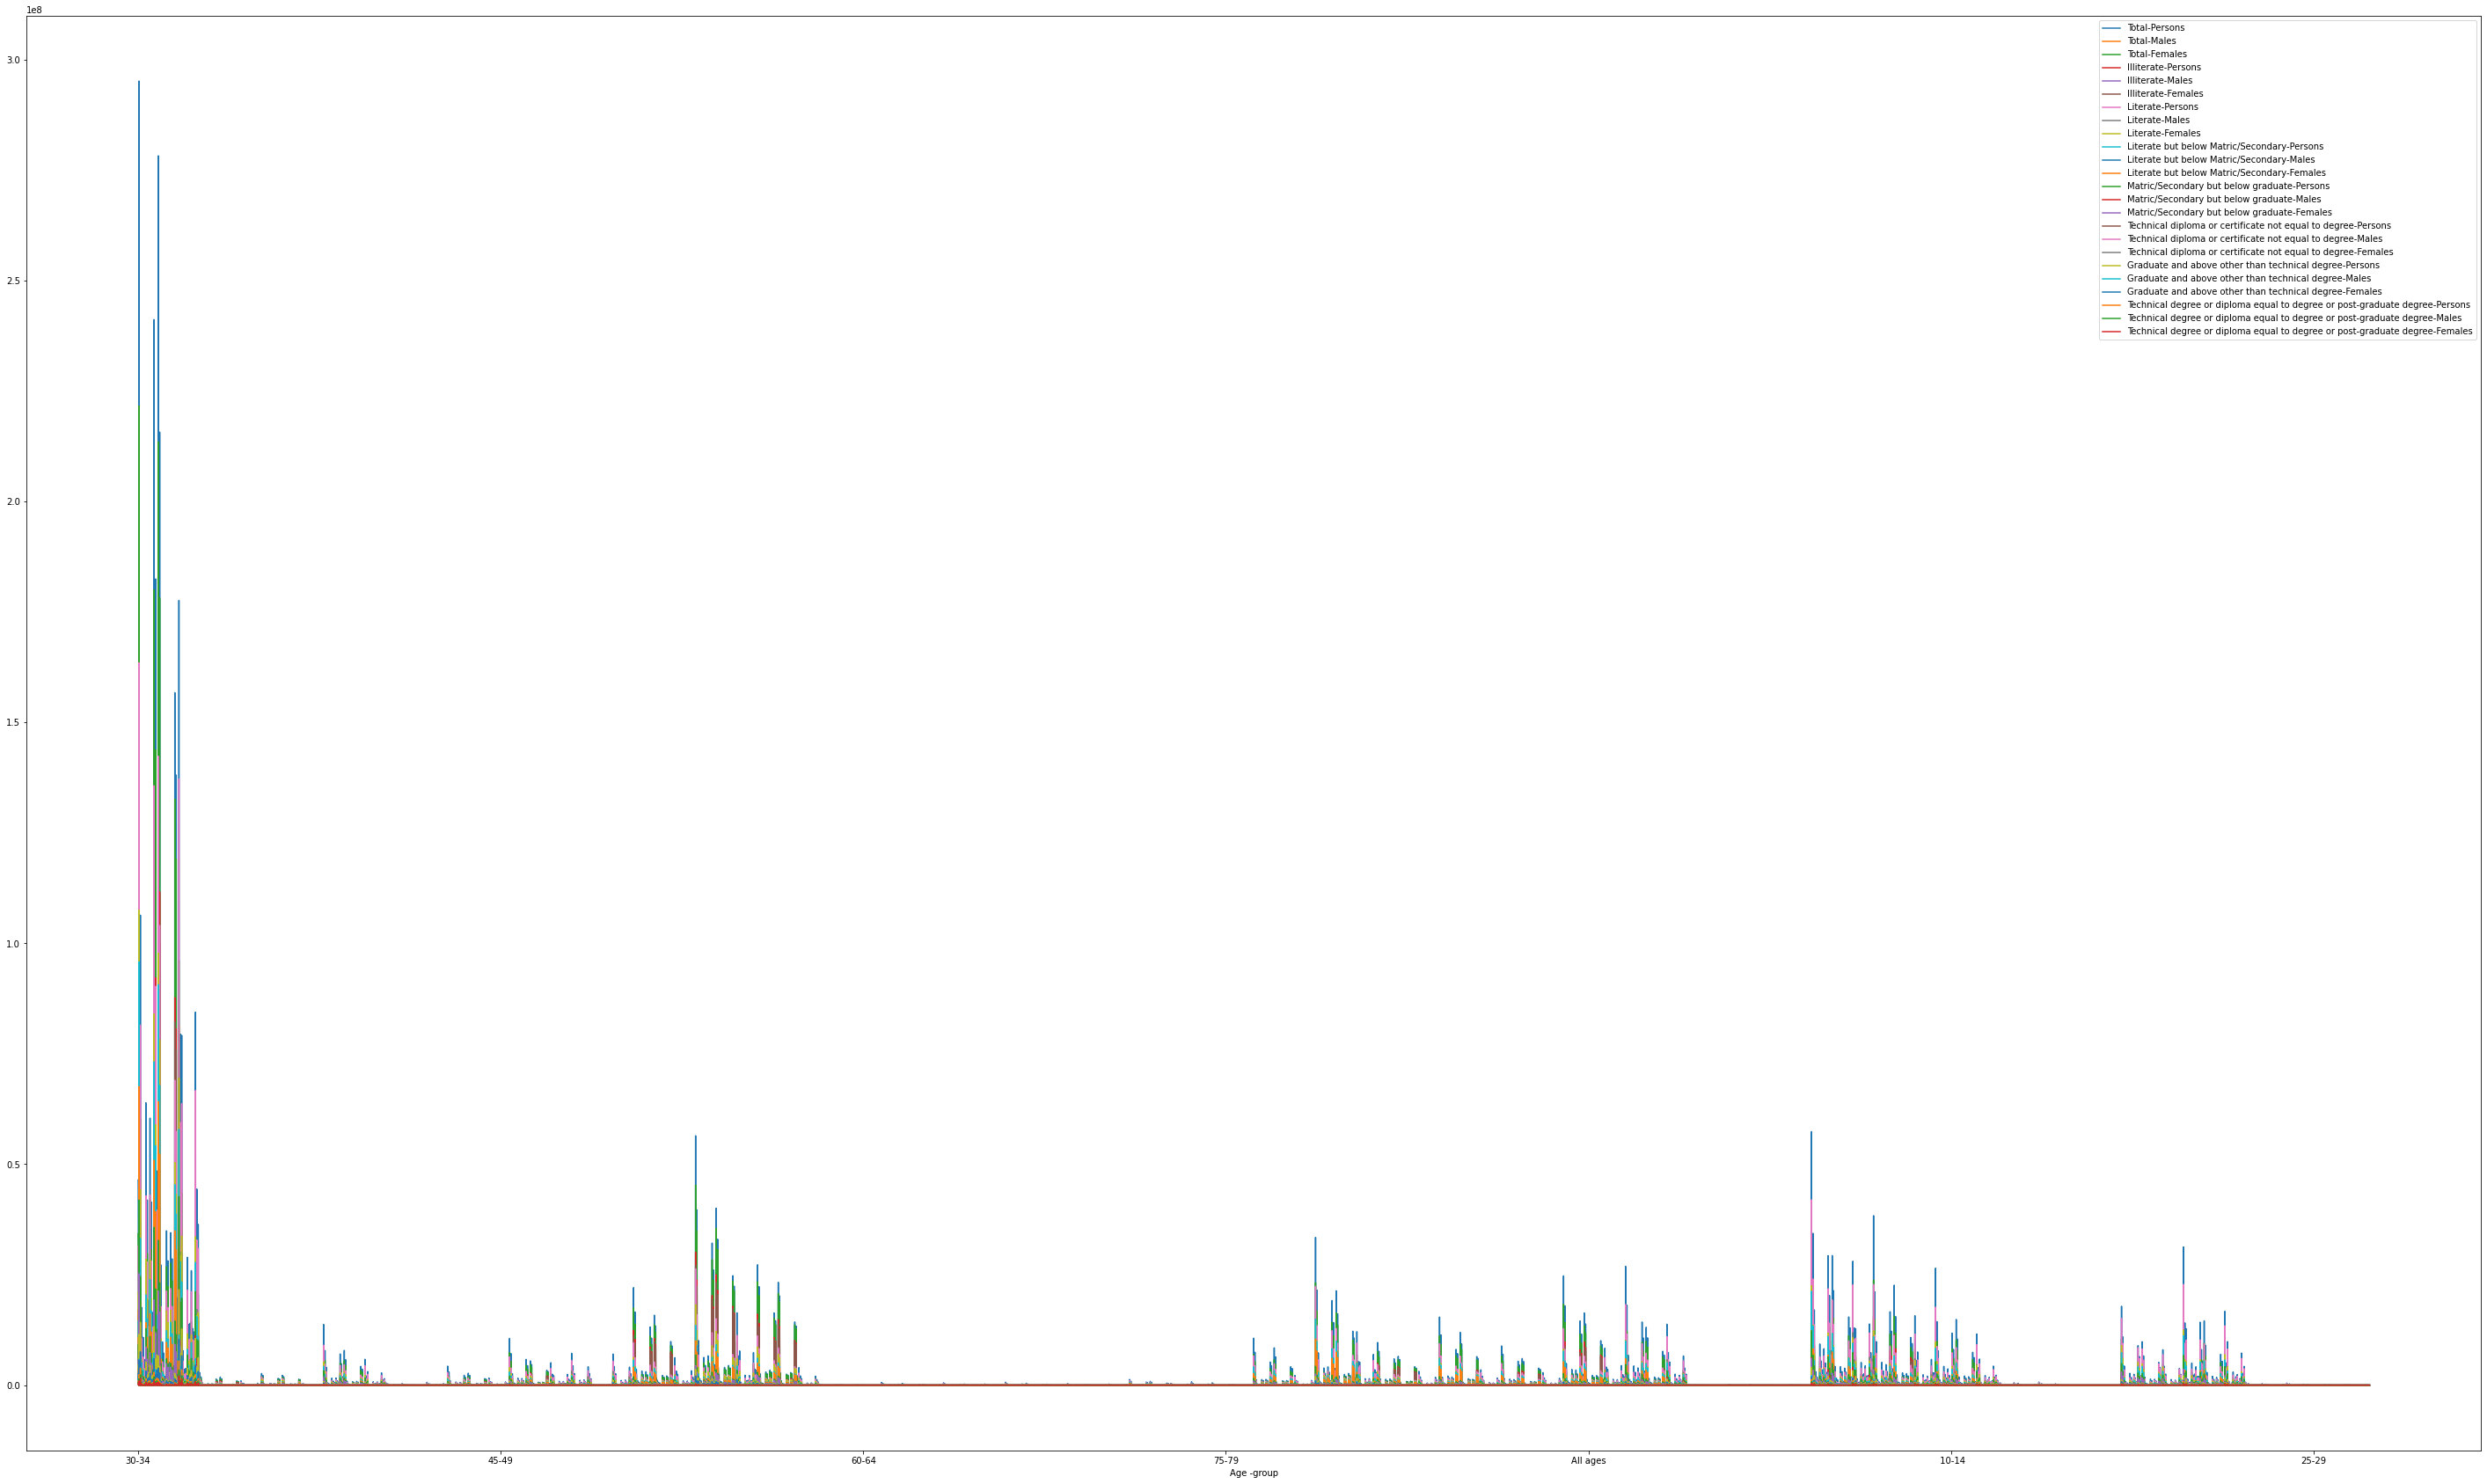

In [ ]:
df4[7:].plot(x="Age -group",y=['Total-Persons',
       'Total-Males', 'Total-Females', 'Illiterate-Persons',
       'Illiterate-Males', 'Illiterate-Females', 'Literate-Persons',
       'Literate-Males', 'Literate-Females',
       'Literate but below Matric/Secondary-Persons',
       'Literate but below Matric/Secondary-Males',
       'Literate but below Matric/Secondary-Females',
       'Matric/Secondary but below graduate-Persons',
       'Matric/Secondary but below graduate-Males',
       'Matric/Secondary but below graduate-Females',
       'Technical diploma or certificate not equal to degree-Persons',
       'Technical diploma or certificate not equal to degree-Males',
       'Technical diploma or certificate not equal to degree-Females',
       'Graduate and above other than technical degree-Persons',
       'Graduate and above other than technical degree-Males',
       'Graduate and above other than technical degree-Females',
       'Technical degree or diploma equal to degree or post-graduate degree-Persons',
       'Technical degree or diploma equal to degree or post-graduate degree-Males',
       'Technical degree or diploma equal to degree or post-graduate degree-Females'],figsize=(50,30))

In [ ]:
df5.columns


Index(['State', 'District', 'Area Name',
       'Place of enumeration-Total/Rural/Urban', 'Duration of residence',
       'Age-group', 'Last residence-Total/Rural/Urban', 'Total-Persons',
       'Total-Males', 'Total-Females', 'Work/Employment-Persons',
       'Work/Employment-Males', 'Work/Employment-Females', 'Business-Persons',
       'Business-Males', 'Business-Females', 'Education-Persons',
       'Education-Males', 'Education-Females',
       'Reason for migration Marriage-Persons',
       'Reason for migration Marriage-Males',
       'Reason for migration Marriage-Females', 'Moved after birth-Persons',
       'Moved after birth-Males', 'Moved after birth-Females',
       'Moved with household-Persons', 'Moved with household-Males',
       'Moved with household-Females', 'Others-Persons', 'Others-Males',
       'Others-Females'],
      dtype='object')

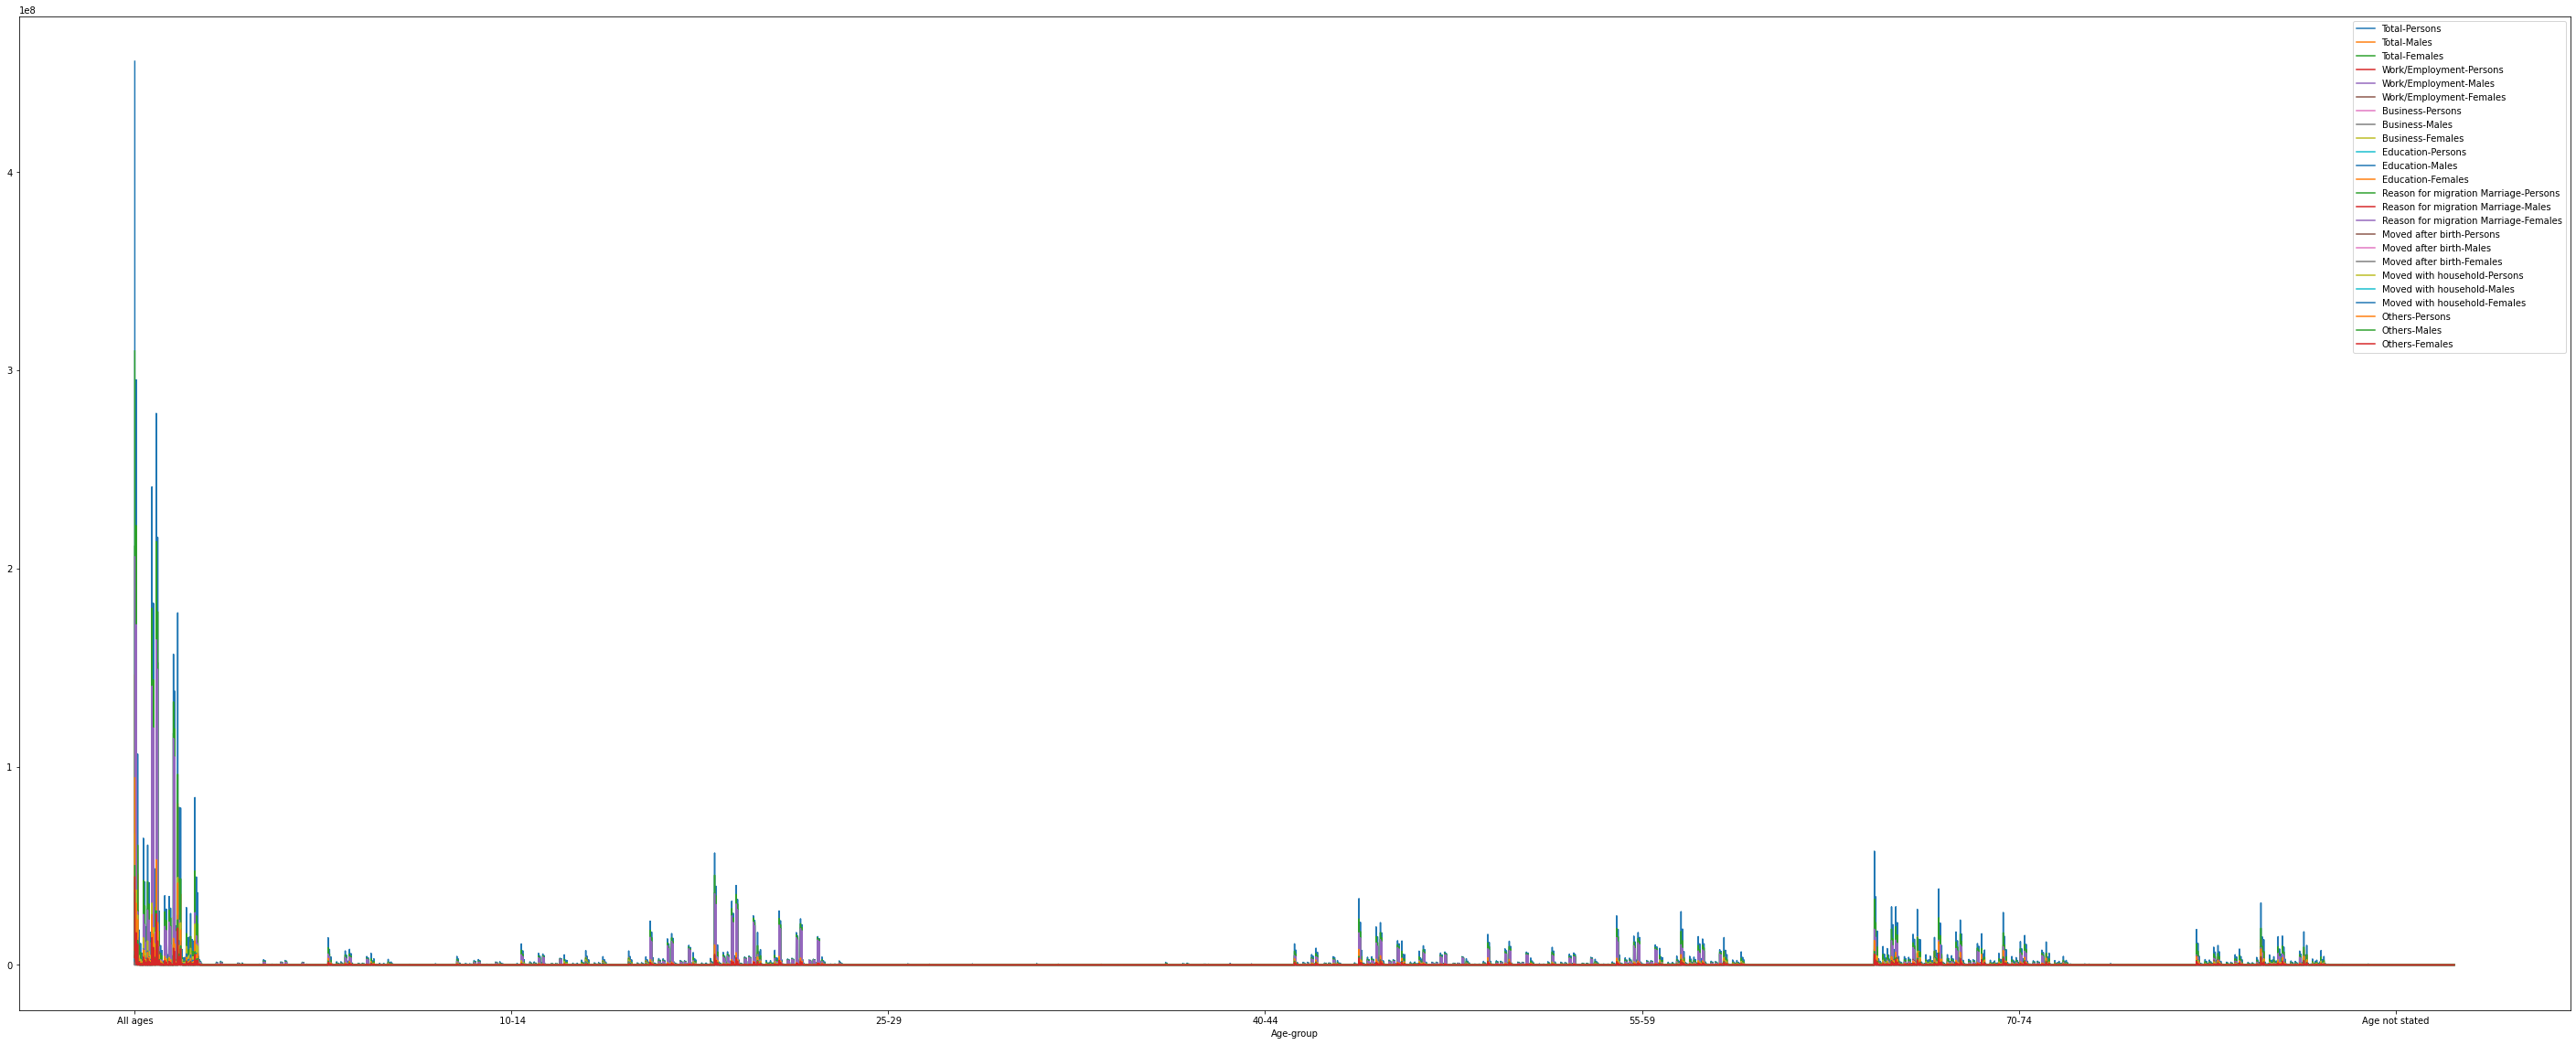

In [ ]:
df5.plot(x="Age-group",y=['Total-Persons',
       'Total-Males', 'Total-Females', 'Work/Employment-Persons',
       'Work/Employment-Males', 'Work/Employment-Females', 'Business-Persons',
       'Business-Males', 'Business-Females', 'Education-Persons',
       'Education-Males', 'Education-Females',
       'Reason for migration Marriage-Persons',
       'Reason for migration Marriage-Males',
       'Reason for migration Marriage-Females', 'Moved after birth-Persons',
       'Moved after birth-Males', 'Moved after birth-Females',
       'Moved with household-Persons', 'Moved with household-Males',
       'Moved with household-Females', 'Others-Persons', 'Others-Males',
       'Others-Females'],figsize=(50,20))

In [ ]:
df12.columns

Index(['State', 'District', 'Area Name',
       'Place of enumeration-Total/Rural/Urban', 'Duration of residence',
       'Age-group', 'Last residence-Total/Rural/Urban', 'Total-Persons',
       'Total-Males', 'Total-Females', 'Work/Employment-Persons',
       'Work/Employment-Males', 'Work/Employment-Females', 'Business-Persons',
       'Business-Males', 'Business-Females', 'Education-Persons',
       'Education-Males', 'Education-Females',
       'Reason for migration Marriage-Persons',
       'Reason for migration Marriage-Males',
       'Reason for migration Marriage-Females', 'Moved after birth-Persons',
       'Moved after birth-Males', 'Moved after birth-Females',
       'Moved with household-Persons', 'Moved with household-Males',
       'Moved with household-Females', 'Others-Persons', 'Others-Males',
       'Others-Females'],
      dtype='object')

In [ ]:
df12.head()

,State,District,Area Name,Place of enumeration-Total/Rural/Urban,Duration of residence,Age-group,Last residence-Total/Rural/Urban,Total-Persons,Total-Males,Total-Females,Work/Employment-Persons,Work/Employment-Males,Work/Employment-Females,Business-Persons,Business-Males,Business-Females,Education-Persons,Education-Males,Education-Females,Reason for migration Marriage-Persons,Reason for migration Marriage-Males,Reason for migration Marriage-Females,Moved after birth-Persons,Moved after birth-Males,Moved after birth-Females,Moved with household-Persons,Moved with household-Males,Moved with household-Females,Others-Persons,Others-Males,Others-Females
0,0,0,INDIA,Total,All durations of residence,All ages,Total,455787621,146145967,309641654,41422917,35016700,6406217,3590487,2683144,907343,5457556,3296340,2161216,211186431,5346733,205839698,33855865,20078947,13776918,65959915,29679662,36280253,94314450,50044441,44270009
1,0,0,INDIA,Total,All durations of residence,0-4,Total,18962713,9834738,9127975,0,0,0,0,0,0,0,0,0,0,0,0,8110528,4222274,3888254,3730463,1950774,1779689,7121722,3661690,3460032
2,0,0,INDIA,Total,All durations of residence,5-9,Total,20917565,10959506,9958059,0,0,0,0,0,0,0,0,0,0,0,0,6559352,3427761,3131591,5340997,2842996,2498001,9017216,4688749,4328467
3,0,0,INDIA,Total,All durations of residence,10-14,Total,23876335,12425108,11451227,164629,98618,66011,29816,16696,13120,1364326,768002,596324,132511,3328,129183,5791897,3011684,2780213,6414425,3408860,3005565,9978731,5117920,4860811
4,0,0,INDIA,Total,All durations of residence,15-19,Total,29202399,12683733,16518666,927556,698007,229549,75333,42524,32809,1776750,1027902,748848,5843341,71376,5771965,4650919,2542586,2108333,6582075,3551603,3030472,9346425,4749735,4596690


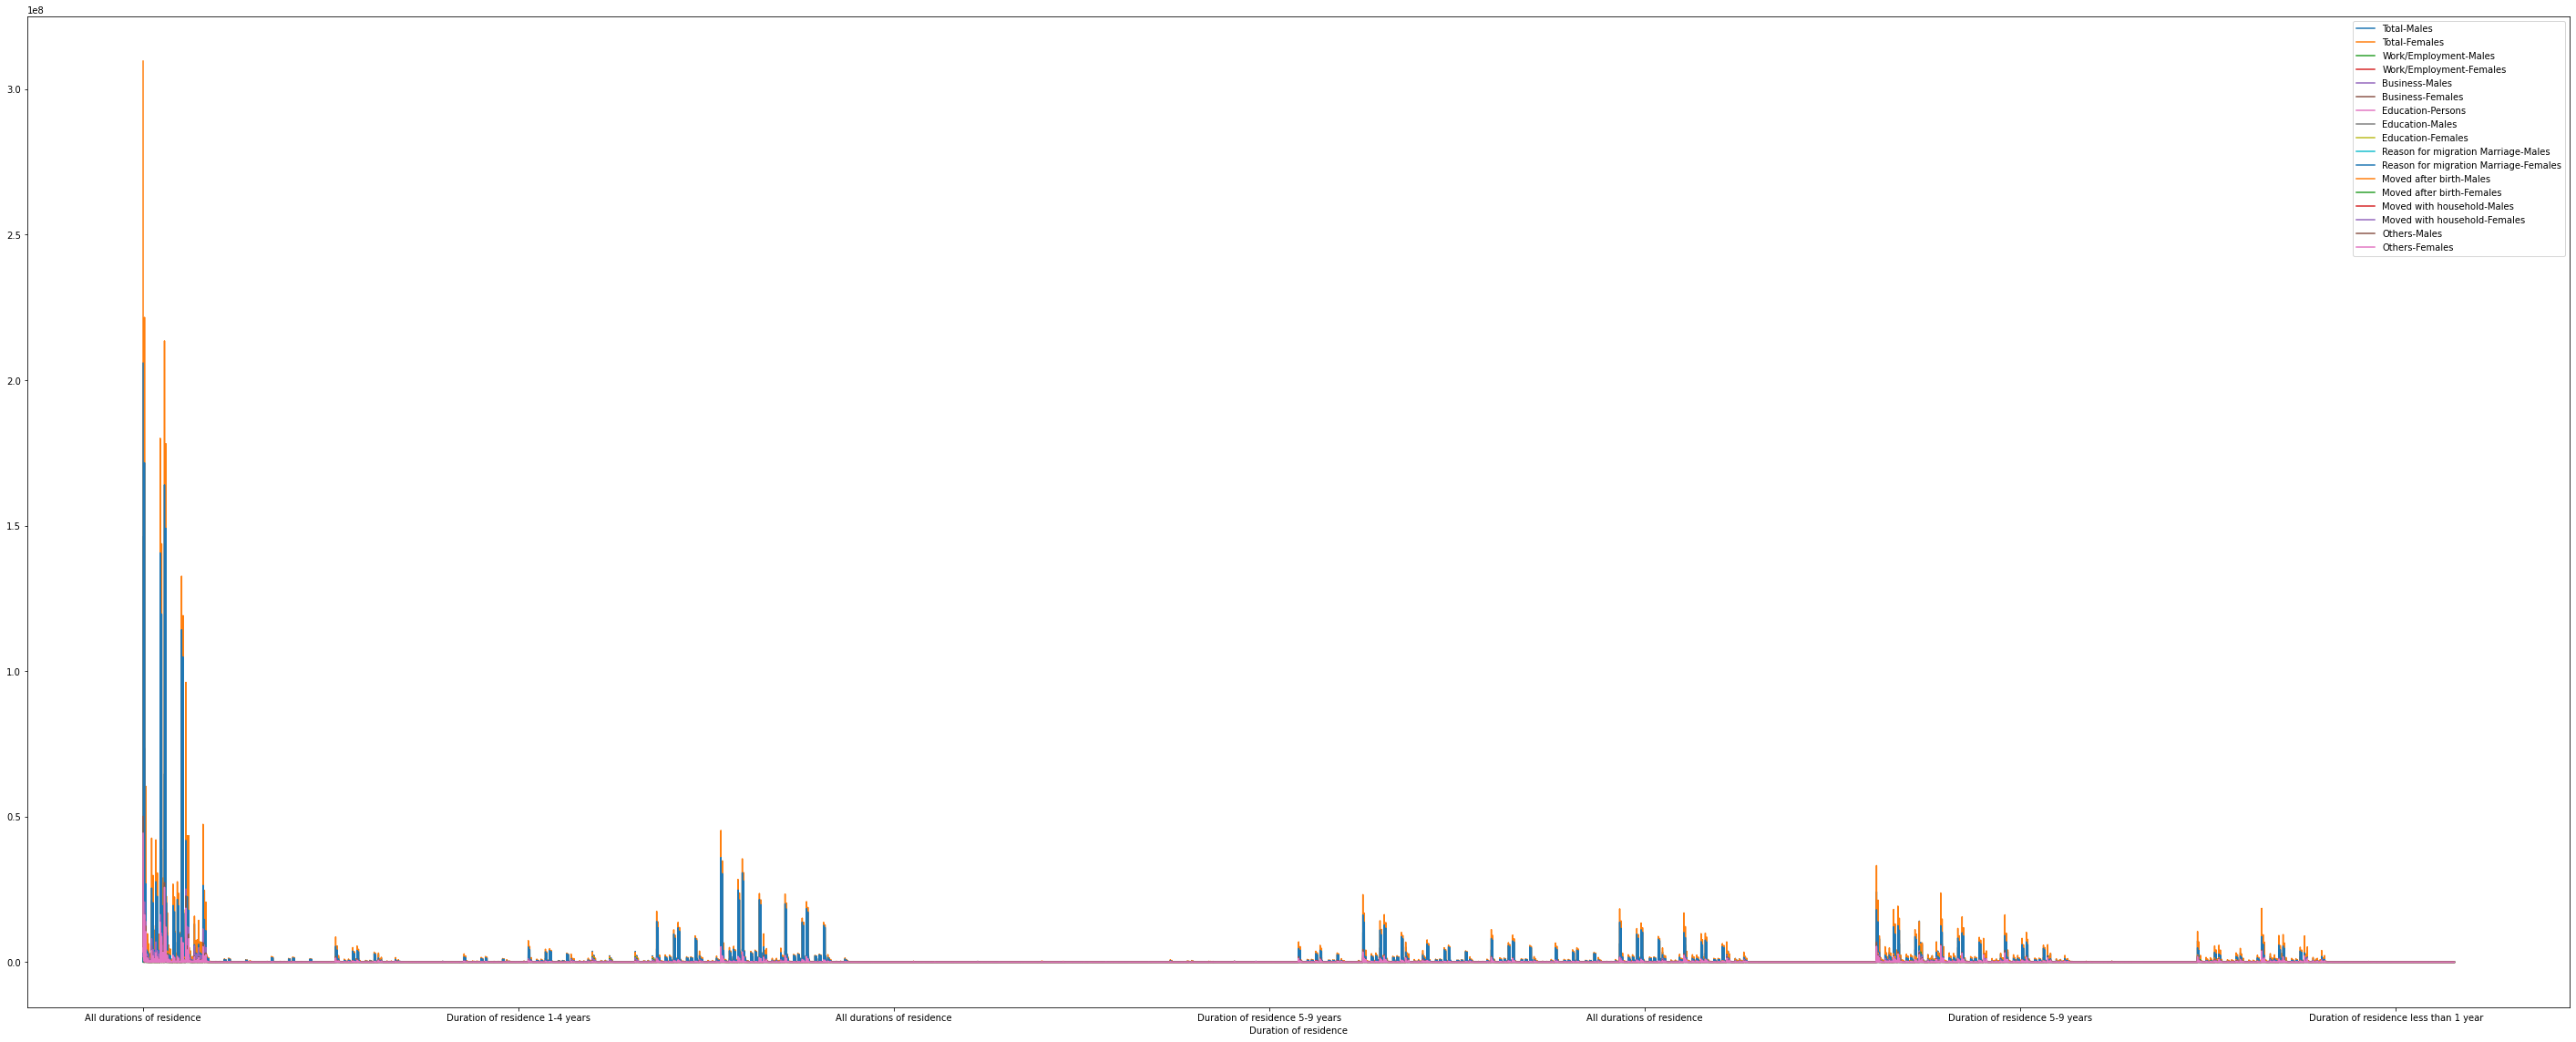

In [ ]:
df12.plot(x="Duration of residence",y=['Total-Males', 'Total-Females', 'Work/Employment-Males', 'Work/Employment-Females', 'Business-Males', 'Business-Females', 'Education-Persons',
       'Education-Males', 'Education-Females',
       'Reason for migration Marriage-Males',
       'Reason for migration Marriage-Females',
       'Moved after birth-Males', 'Moved after birth-Females',
        'Moved with household-Males',
       'Moved with household-Females',  'Others-Males',
       'Others-Females'],figsize=(50,20))

# ***Code for query system***

In [ ]:
#df1[(df1['Area Name']=='INDIA') & (df1['Birth place']=='Goa')]["Total-Males"]
valid_birth_place=df1["Birth place"]
valid_birth_place=set(valid_birth_place)

# ***Query related to birth place and current place***

In [ ]:
# all the prerequisite functions
def type_q1():
  valid_birth_place=df1["Birth place"]
  valid_birth_place=set(valid_birth_place)
  valid_current_place=df1["Area Name"]
  valid_current_place=set(valid_current_place)

  print(" Enter birth place")
  a=input()
  if a not in valid_birth_place:
    print("Enter valid birth place")
    a=input()
  else:
      pass

  print(" Enter current area")
  b=input()
  if a not in valid_current_place:
    print("Enter valid current area")
    b=input()
  else:
      pass
  print("The information from the dataframe is")
  df1[(df1['Area Name']==a) & (df1['Birth place']==b)]
  print("People belonging to Other Categories")
  df2[(df2['Area Name']==a) & (df2['Birth place']==b)]


# ***Query related to relocation from urban to rural and duration***

In [ ]:
def type_q2():
  valid_last_residence=df1["Last-residence"]
  valid_last_residence=set(valid_last_residence)
  valid_current_place=df1["Area Name"]
  valid_current_place=set(valid_current_place)

  print(" Enter last residence")
  a=input()
  if a not in valid_last_residence:
    print("Enter valid last residence")
    a=input()
  else:
      pass
  print(" Enter current area")
  b=input()
  if a not in valid_current_place:
    print("Enter valid current area")
    b=input()
  else:
      pass
  print("The information from the dataframe is")
  df3[(df3['Last-residence']==a) & (df3['Birth place']==b)]
  df3[(df3['Last-residence']==a) & (df3['Birth place']==b)].plot(x='Area Name',y=['Totals-Persons', 'Total-Males',
       'Total-Females', 'Lessthan1-Persons', 'Lessthan1-Males',
       'Lessthan1-Females', '1-4-Persons', '1-4-Males', '1-4-Females',
       '5-9-Persons', '5-9-Males', '5-9-Females', '10-19-Persons',
       '10-19-Males', '10-19-Females', '20+-Persons', '20+-Males',
       '20+-Females', 'Durationnotstated-Persons', 'Durationnotstated-Males',
       'Durationnotstated-Females'])
  #histogram representation of male- female comparison
  df3_cp=df3[(df3['Last-residence']==a) & (df3['Birth place']==b)]["Total-Males","Total-Females"]
  df3.hist()

  #df3_cp=df3[(df3['Last-residence']==a) & (df3['Birth place']==b)]["20+-Males","20+-Females"]
  #df3.hist()




  #plot of df4




# ***Histogram for gender analysis***

In [ ]:
#df3_cp=df3[(df3['Last-residence']==a) & (df3['Birth place']==b)]["20+-Males","20+-Females"]
#df3_cp.hist()


# ***Query related to place of last residence, economic activity, age, sex and duration of residence ***

In [ ]:
# all the prerequisite functions
def type_q3():
  valid_area_name=df6["Area Name"]
  valid_area_name=set(valid_area_name)
  valid_duration_of_residence=df6["Duration of residence-"]
  valid_duration_of_residence=set(valid_duration_of_residence)
  valid_area_name=df6["Age-group"]
  valid_area_name=set(valid_area_name)

  print(" Enter Age-group")
  a=input()
  if a not in valid_age_group:
    print("Enter valid age group")
    a=input()
  else:
      pass

  print(" Enter Area-Name")
  c=input()
  if a not in valid_area_name:
    print("Enter valid age group")
    a=input()
  else:
      pass

  print("Enter duration of residence")
  b=input()
  if a not in valid_duration_of_residence:
    print("Enter duration of residence")
    b=input()
  else:
      pass
  print("The information from the dataframe is")
  df6[(df6['Age-group']==a) & (df6['Duration of residence-']==b) & (df6['Area-Name']==c)]
  #print("People belonging to Other Categories")
  #df2[(df2['Area Name']==a) & (df2['Birth place']==b)]
  df6[(df6['Age-group']==a) & (df6['Duration of residence-']==b) & (df6['Area-Name']==c)].plot(x='Age-group',y=['Totals-Persons', 'Total-Males',
       'Total-Females', 'Lessthan1-Persons', 'Lessthan1-Males',
       'Lessthan1-Females', '1-4-Persons', '1-4-Males', '1-4-Females',
       '5-9-Persons', '5-9-Males', '5-9-Females', '10-19-Persons',
       '10-19-Males', '10-19-Females', '20+-Persons', '20+-Males',
       '20+-Females', 'Durationnotstated-Persons', 'Durationnotstated-Males',
       'Durationnotstated-Females'])


In [ ]:
df6.columns

Index(['State', 'District', 'Area Name',
       'Place of enumeration-Total/Rural/Urban', 'Duration of residence-',
       'Age-group', 'Last residence-Total/Rural/Urban', 'Total-Persons',
       'Total-Males', 'Total-Females', 'Main workers-Persons',
       'Main workers-Males', 'Main workersFemales',
       'Marginal workers total-Persons', 'Marginal workers total-Males',
       'Marginal workers total-Females',
       'Marginal workers Seeking/Available for work-Persons',
       'Marginal workers Seeking/Available for work-Males',
       'Marginal workers Seeking/Available for work-Females',
       'Non-workers Total-Persons', 'Non-workers Total-Males',
       'Non-workers Total-Females',
       'Non-workers Seeking/Available for work-Persons',
       'Non-workers Seeking/Available for work-Males',
       'Non-workers Seeking/Available for work-Females'],
      dtype='object')

NameError: ignored

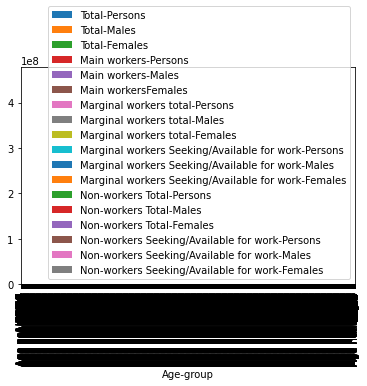

In [ ]:
#df4.columns
df6.plot.bar(x='Age-group',y=['Total-Persons',
       'Total-Males', 'Total-Females', 'Main workers-Persons',
       'Main workers-Males', 'Main workersFemales',
       'Marginal workers total-Persons', 'Marginal workers total-Males',
       'Marginal workers total-Females',
       'Marginal workers Seeking/Available for work-Persons',
       'Marginal workers Seeking/Available for work-Males',
       'Marginal workers Seeking/Available for work-Females',
       'Non-workers Total-Persons', 'Non-workers Total-Males',
       'Non-workers Total-Females',
       'Non-workers Seeking/Available for work-Persons',
       'Non-workers Seeking/Available for work-Males',
       'Non-workers Seeking/Available for work-Females'])
plot.show(block=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57b69c7e50>,
      dtype=object)

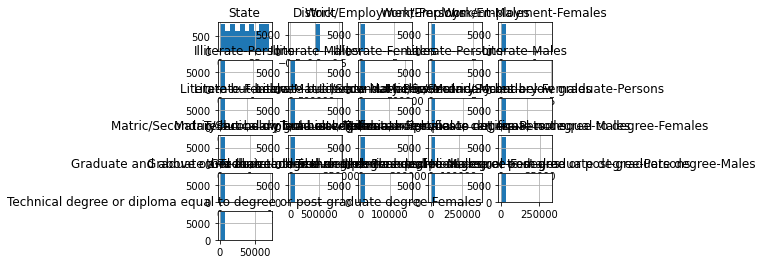

In [ ]:
import pandas as pd
df7 = pd.read_excel('/content/sample_data/D-7.XLSX')
#df7.groupby('Age -group').plot()
#df7.groupby('Age -group').count().plot(kind="bar")
df7.hist()


In [ ]:
df7.columns

Index(['State', 'District', 'Area Name',
       'Place of enumeration-Total/Rural/Urban', 'Moved from Last area',
       'Age -group', 'Work/Employment-Persons', 'Work/Employment-Males',
       'Work/Employment-Females', 'Illiterate-Persons', 'Illiterate-Males',
       'Illiterate-Females', 'Literate-Persons', 'Literate-Males',
       'Literate-Females', 'Literate but below Matric/Secondary-Persons',
       'Literate but below Matric/Secondary-Males',
       'Literate but below Matric/Secondary-Females',
       'Matric/Secondary but below graduate-Persons',
       'Matric/Secondary but below graduate-Males',
       'Matric/Secondary but below graduate-Females',
       'Technical diploma or certificate not equal to degree-Persons',
       'Technical diploma or certificate not equal to degree-Males',
       'Technical diploma or certificate not equal to degree-Females',
       'Graduate and above other than technical degree-Persons',
       'Graduate and above other than technical degree

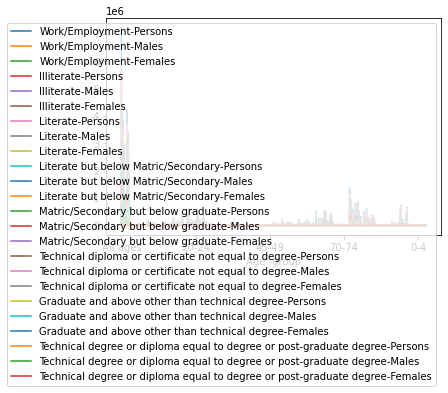

In [ ]:
# all the prerequisite functions
#def type_q4():
#df7.plot.legend(loc=2, prop={'size': 6})
df7.plot(x='Age -group',y=['Work/Employment-Persons', 'Work/Employment-Males',
       'Work/Employment-Females', 'Illiterate-Persons', 'Illiterate-Males',
       'Illiterate-Females', 'Literate-Persons', 'Literate-Males',
       'Literate-Females', 'Literate but below Matric/Secondary-Persons',
       'Literate but below Matric/Secondary-Males',
       'Literate but below Matric/Secondary-Females',
       'Matric/Secondary but below graduate-Persons',
       'Matric/Secondary but below graduate-Males',
       'Matric/Secondary but below graduate-Females',
       'Technical diploma or certificate not equal to degree-Persons',
       'Technical diploma or certificate not equal to degree-Males',
       'Technical diploma or certificate not equal to degree-Females',
       'Graduate and above other than technical degree-Persons',
       'Graduate and above other than technical degree-Males',
       'Graduate and above other than technical degree-Females',
       'Technical degree or diploma equal to degree or post-graduate degree-Persons',
       'Technical degree or diploma equal to degree or post-graduate degree-Males',
       'Technical degree or diploma equal to degree or post-graduate degree-Females'])


In [ ]:
#df1[(df1['Area Name']=='INDIA') & (df1['Birth place']=='Goa')]
#df3.shape
df3_new=df3
df3_new['new']=df3_new['Lastresidency-Total/Rural/Urban/Country']+" = > " + df3_new['Placeofenumeration-Total/Rural/Urban']
df3_new['new']

0            Total = > Total
1            Total = > Rural
2            Total = > Urban
3            Total = > Total
4            Total = > Rural
                ...         
18031    Elsewhere = > Rural
18032    Elsewhere = > Urban
18033        Total = > Total
18034        Total = > Rural
18035        Total = > Urban
Name: new, Length: 18036, dtype: object

2
Query related to relocation from urban to rural and duration
 Enter last residence
Elsewhere in the district of enumeration
 Enter current area
INDIA
The information from the dataframe is


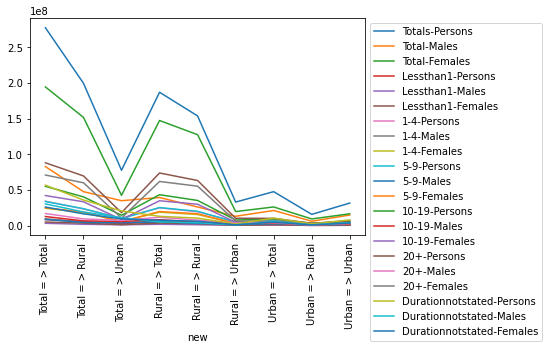

In [ ]:
a=int(input())
if a==1:
  print("Query related to birth place and current place")
  valid_birth_place=df1["Birth place"]
  valid_birth_place=set(valid_birth_place)
  valid_current_place=df1["Area Name"]
  valid_current_place=set(valid_current_place)

  print(" Enter birth place")
  a=input()
  if a not in valid_birth_place:
    print("Enter valid birth place")
    a=input()
  else:
      pass

  print(" Enter current area")
  b=input()
  if b not in valid_current_place:
    print("Enter valid current area")
    b=input()
  else:
      pass
  print("The information from the dataframe is")
  display(df1[(df1['Area Name']==b) & (df1['Birth place']==a)])
  #print(df_e)
  #print(df1[(df1['Area Name']==a) & (df1['Birth place']==b)])
  #print("People belonging to Other Categories")
  #df_ee=df2[(df2['Area Name']==b) & (df2['Birth place']==a)]
  #print(df_ee)
  #print(df2[(df2['Area Name']==a) & (df2['Birth place']==b)])

elif a==2:
  print("Query related to relocation from urban to rural and duration")
  valid_last_residence=df3["Last-residence"]
  valid_last_residence=set(valid_last_residence)
  valid_current_place=df3["Area Name"]
  valid_current_place=set(valid_current_place)

  print(" Enter last residence")
  a=input()
  if a not in valid_last_residence:
    print("Enter valid last residence")
    a=input()
  else:
      pass
  print(" Enter current area")
  b=input()
  if b not in valid_current_place:
    print("Enter valid current area")
    b=input()
  else:
      pass
  print("The information from the dataframe is")
  df3_new=df3
  df3_new['new']=df3_new['Lastresidency-Total/Rural/Urban/Country']+" = > " + df3_new['Placeofenumeration-Total/Rural/Urban']
  #df3_new=df3['Lastresidency-Total/Rural/Urban/Country']+df3['Placeofenumeration-Total/Rural/Urban']
  #df3[(df3['Last-residence']==a) & (df3['Area Name']==b)]
  df3_new[(df3_new['Last-residence']==a) & (df3_new['Area Name']==b)].plot(x='new',y=['Totals-Persons', 'Total-Males',
       'Total-Females', 'Lessthan1-Persons', 'Lessthan1-Males',
       'Lessthan1-Females', '1-4-Persons', '1-4-Males', '1-4-Females',
       '5-9-Persons', '5-9-Males', '5-9-Females', '10-19-Persons',
       '10-19-Males', '10-19-Females', '20+-Persons', '20+-Males',
       '20+-Females', 'Durationnotstated-Persons', 'Durationnotstated-Males',
       'Durationnotstated-Females'],rot=90).legend(bbox_to_anchor=(1,1))
  #df3_cp=df3[(df3['Last-residence']==a) & (df3['Area Name']==b)]['Total-Males','Total-Females']
  #df3.hist()

elif a==3:
  print("Query related to relocation from urban to rural and duration")
  valid_area_name=df6["Area Name"]
  valid_area_name=set(valid_area_name)
  valid_duration_of_residence=df6["Duration of residence-"]
  valid_duration_of_residence=set(valid_duration_of_residence)
  valid_age_group=df6["Age-group"]
  valid_age_group=set(valid_age_group)

  print(" Enter Age-group")
  a=input()
  if a not in valid_age_group:
    print("Enter valid age group")
    a=input()
  else:
      pass

  print(" Enter Area-Name")
  c=input()
  if c not in valid_area_name:
    print("Enter valid age group")
    a=input()
  else:
      pass

  print("Enter duration of residence")
  b=input()
  if b not in valid_duration_of_residence:
    print("Enter duration of residence")
    b=input()
  else:
      pass
  print("The information from the dataframe is")
  df6[(df6['Age-group']==a) & (df6['Duration of residence-']==b) & (df6['Area Name']==c)]
  #print("People belonging to Other Categories")
  #df2[(df2['Area Name']==a) & (df2['Birth place']==b)]
  df6[(df6['Age-group']==a) & (df6['Duration of residence-']==b) & (df6['Area Name']==c)].plot(x='Age-group',y=['Total-Persons',
       'Total-Males', 'Total-Females', 'Main workers-Persons',
       'Main workers-Males', 'Main workersFemales',
       'Marginal workers total-Persons', 'Marginal workers total-Males',
       'Marginal workers total-Females',
       'Marginal workers Seeking/Available for work-Persons',
       'Marginal workers Seeking/Available for work-Males',
       'Marginal workers Seeking/Available for work-Females',
       'Non-workers Total-Persons', 'Non-workers Total-Males',
       'Non-workers Total-Females',
       'Non-workers Seeking/Available for work-Persons',
       'Non-workers Seeking/Available for work-Males',
       'Non-workers Seeking/Available for work-Females'])

elif a==4:
  print("Visualisations related to relocation from urban to rural and duration")
  type_q4


In [ ]:
# Load dataset
data = pd.read_csv('https://github.com/nishusharma1608/India-Census-2011-Analysis/blob/master/india-districts-census-2011.csv')



ParserError: ignored

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/india-districts-census-2011 (2).csv')
# shape
data.shape

(640, 118)

In [ ]:

# head
data.head()
#data.shape

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,...,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,36913,33439,229064,190899,38165,123837,105227,641290,34680,56759,7946,129679,37128,823286,1700,5600,66,39,13,2522,15828,83071,762,5256,158438,23226,181664,...,11127,5030,1902,24776,6597,34882,37849,22747,1607,50339,2066,911,4036,4947,6396,31982,10700,14886,42727,27121,46181,80569,14618,2218,2622,330,74,8968,259,494,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,343,25,23912,12383,11529,214866,162578,52288,132003,82863,538879,55299,36630,29102,93835,10110,736054,1489,5559,47,6,2,478,15118,90190,1999,5892,160649,27190,187839,...,699,9864,453,13064,1052,14705,33558,51358,136,73303,2321,845,2173,3018,3743,23640,7998,11899,59121,13440,14303,71441,15255,2962,3493,452,79,9030,201,436,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,444,44,95857,47543,48314,75079,53265,21814,57125,17954,58408,20869,1645,1020,51545,22882,19057,658,1092,88635,103,54,1006,13645,17250,574,2150,36920,17474,54394,...,64,5991,620,6115,1565,8355,10962,3031,55,6254,135,1630,1483,3113,2302,10528,4422,3804,5378,1758,6784,12742,3492,716,835,87,32,3708,33,76,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,12,6,122336,62652,59684,51873,39839,12034,28941,22932,88929,8266,3763,1222,38622,10341,108239,604,1171,20126,28,4,289,3285,15824,235,1005,40370,7774,48144,...,1,3289,323,2641,907,4068,9218,1963,197,10769,19,689,834,1523,983,4991,1652,2356,6832,4866,7031,10366,3835,1252,1643,308,83,2368,39,87,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,406,150,176101,90274,85827,161393,117677,43716,73247,88146,315442,54264,31583,3930,71616,32604,

In [ ]:

# descriptions
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,...,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,640.000000,640.000000,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,1.633527e+05,82105.023438,81247.657812,7.529514e+05,5.186561e+05,2.342953e+05,5.665087e+05,186442.651562,1.139010e+06,1.856387e+05,2.255513e+05,28653.387500,3.131379e+05,1.509777e+06,2.691331e+05,4.346811e+04,3.255174e+04,13192.143750,6955.864062,12402.709375,4480.160937,1.100358e+05,2.592145e+05,12044.564062,36504.446875,3.448374e+05,1.720935e+05,5.169309e+05,2.372994e+05,3.217925e+05,...,36390.417188,1.617431e+05,2053.993750,2422.732812,5694.256250,13413.453125,138141.403125,1.795638e+05,3242.470313,1.678237e+05,32681.365625,14130.067188,37473.221875,51603.289062,52596.440625,2.123476e+05,87464.987500,72286.215625,95943.710938,25562.648438,67752.100000,2.702576e+05,54493.914062,12362.385937,15951.329687,2699.464063,889.47968

In [ ]:
# class distribution
print(data.groupby('State name').size())


State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

# ***Geographical map of states with low literacy rates.***

In [ ]:
'''
Calculating state wise literacy rates
'''

# Group the data state-wise
states_group = data.groupby(by = "State name")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'

    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))

print ("Statewise literacy rates : \n")
print (literacy_rate)

Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

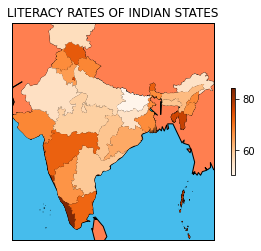

In [ ]:
import matplotlib.pyplot as plt

'''
STEP 2 : CREATING A MAP
'''
# Create figure
fig, ax = plt.subplots()  # returns fig and axis related
# Create a map with the coordinates determined by the Bounding Box tool
# A cylindrical, conformal projection. - merc
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')  #
# Fill continents and lakes
m.fillcontinents(color='coral',lake_color='aqua')
# Draw coast lines
m.drawcoastlines()

'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES
'''
# Load the shape file of India
m.readshapefile("/content/sample_data/INDIA","INDIA")


'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND LITERACY RATES
'''
# Create an empty list to hold literacy rates
lit_rate = []
# Iterate through all rows of INDIA_info file
# Each row is a dictionary. Here, we try to map state name with literacy rate
for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['ST_NAME'].upper()
    # initialize rate = 0
    rate = 0

    # In literacy_rate (containing tuples of state name and literacy rates), search for state 'state'
    # Append its corresponding literacy rate to lit_rate
    for x in literacy_rate:
        if x[0] == state:
            rate = x[1]
            break
    lit_rate.append(rate)

# Create a dataframe containing shapes, state names and literacy rates
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['ST_NAME'] for area in m.INDIA_info],
        'lit_rate' : lit_rate
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the literacy rate of the state
pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
ax.add_collection(pc)

# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(lit_rate)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("LITERACY RATES OF INDIAN STATES")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
literacy_rate.sort(key = operator.itemgetter(1))
print (literacy_rate[:5])


[('BIHAR', 50.43691584466746), ('ARUNACHAL PRADESH', 55.35810170647822), ('JHARKHAND', 55.55958090869887), ('RAJASTHAN', 55.8368413272501), ('JAMMU AND KASHMIR', 56.351669069128555)]


In [ ]:
df_Bihar = data.loc[data['State name'] == 'BIHAR']
df_Tamil_Nadu = data.loc[data['State name'] == 'TAMIL NADU']

In [ ]:

print ("rows = %s"%(str(len(df_Tamil_Nadu))))
df_Tamil_Nadu.head()

rows = 32


,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,...,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
601,602,TAMIL NADU,Thiruvallur,3728104,1876062,1852042,2791721,1495711,1296010,821646,410526,411120,47243,23692,23551,1538054,1103563,434491,1247918,290136,2190050,73444,270586,58240,1135784,3325823,143093,233633,1422,951,3693,530,18959,621907,909400,75634,174279,387237,732196,1119433,...,53570,175520,1374,412,41640,44284,531907,343722,858,625071,148885,32054,118838,150892,185181,671689,321799,164709,103687,12554,63193,717165,93063,9615,10766,1021,130,117828,539,1940,1732,3672,1137,455,1592,472,876,1348,580,7731
602,603,TAMIL NADU,Chennai,4646732,2335844,2310888,3776276,1968079,1808197,779667,389001,390666,10061,5207,4854,1817297,1369302,447995,1619554,197743,2829435,14454,13674,37345,1751824,3751322,439270,358662,2851,2804,51708,1759,38356,910262,1096334,217368,355838,0,1314125,1314125,...,3500,170162,1061,49,18353,19543,245763,844285,80,908587,43461,30582,139139,169721,237897,798018,377533,182588,122912,15916,16519,859219,111380,15288,17628,1926,414,118340,471,2117,3685,5802,1954,1866,3820,748,1214,1962,3686,15742
603,604,TAMIL NADU,Kancheepuram,3998252,2012958,1985294,3013382,1611461,1401921,948081,474264,473817,41210,20605,20605,1673814,1181308,492506,1367378,306436,2324438,89343,272514,54732,1257225,3537399,173785,256762,1620,990,4962,756,21978,622095,961161,100322,200738,438799,774705,1213504,...,39231,163172,1413,1411,26856,32942,496248,435671,3262,732354,129924,37098,128984,166082,196143,701330,325921,179266,115195,11202,61890,761575,97620,10013,11193,1025,155,123421,541,1993,1965,3958,1138,560,1698,522,832,1354,797,8349
604,605,TAMIL NADU,Vellore,3936331,1961688,1974643,2773928,1504355,1269573,860212,424668,435544,72955,36663,36292,1689330,1123874,565456,1360185,329145,2247001,175108,391955,136415,985852,3397857,414760,111390,676,438,3514,251,7445,417535,865913,20623,69912,653499,486801,1140300,...,26842

In [ ]:
def similar_districts(df1, df2):
    # Set indices for both the data frames
    df1.set_index('District code')
    df2.set_index('District code')

    # The similarity matrix of size len(df1) X len(df2)
    main_diff = []

    # Iterate through rows of df1
    for row1 in df1.iterrows():
        # Create list to hold similarity score of row1 with other rows of df2
        diff=[]
        # Iterate through rows of df2
        for row2 in df2.iterrows():
            # Calculate sum of squared differences
            dist = 0
            for column in list(data)[3:]:
                max_col = max(data[column])
                min_col = min(data[column])

                dist += pow((row1[1][column] - row2[1][column])/(max_col - min_col),2)
            # Take sqrt and inverse the result
            diff.append(1/math.sqrt(dist))
        # Append similarity scores
        main_diff.append(diff)

    # Find the max value of similarity score from lists of lists
    max_val = 0
    max_index1 = 0
    max_index2 = 0
    for i in range(len(main_diff)):

        for j in range(len(main_diff[i])):
            if(main_diff[i][j] > max_val):
                max_val = main_diff[i][j]
                max_index1 = i
                max_index2 = j

    print ("%s from Bihar and %s from Tamil Nadu are most similar" %(df1['District name'].iloc[max_index1],
                                                                    df2['District name'].iloc[max_index2]))
    return main_diff

sim_matrix = similar_districts(df_Bihar, df_Tamil_Nadu)

Sheohar from Bihar and Perambalur from Tamil Nadu are most similar


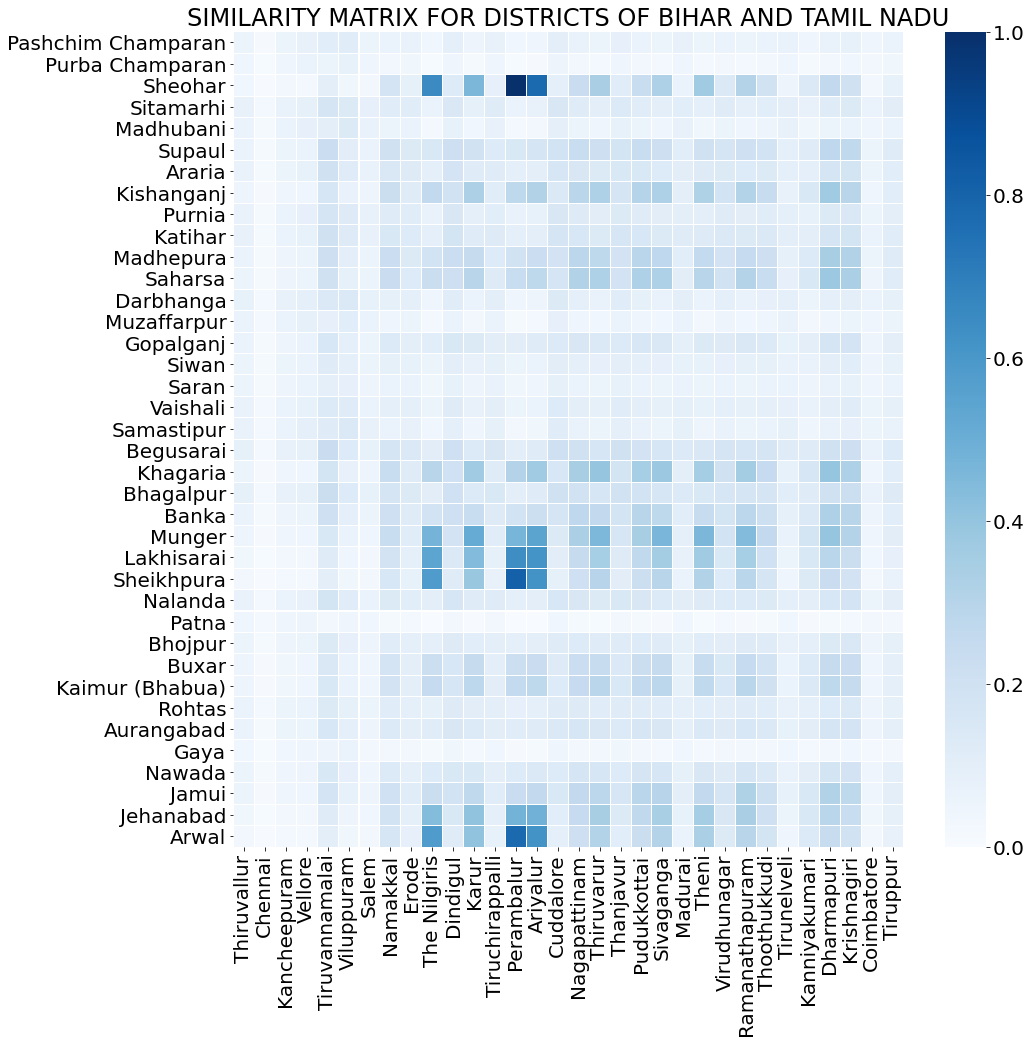

In [ ]:
norm=Normalize()
ax = plt.axes()
# Plot the matrix using a heatmap from seaborn
# Values of the matrix are normalized so as to fall between 0 and 1
sns.heatmap(norm(sim_matrix), xticklabels=df_Tamil_Nadu['District name'],yticklabels=df_Bihar['District name'],
            linewidths=0.05,cmap='Blues').set_title("SIMILARITY MATRIX FOR DISTRICTS OF BIHAR AND TAMIL NADU")
plt.rcParams['figure.figsize'] = (15,15)

In [ ]:
# Create a group w.r.t. State name
states_group = data.groupby(by = "State name")

# Lists for storing mobile penetration and agri workers' values for each state
households_with_mobile = []
agri_workers = []

# Iterate through the groups
for key , group in states_group:
    total_mobi_pop = 0
    total_agri_workers = 0

    # Iterate through each group and calculate total agri workers and total households with mobiles
    for row in group.iterrows():

        #total_mobi_pop += row[1][58] # 58 = Index of column 'Households_with_Telephone_Mobile_Phone_Landline_only'
        total_mobi_pop += row[1][59] # 59 = Index of column 'Households_with_Telephone_Mobile_Phone_Mobile_only'
        total_agri_workers += row[1][22] # 22 = Index of 'Agricultural Workers'

    # Append both values to respective lists
    households_with_mobile.append((key,total_mobi_pop))
    agri_workers.append((key,total_agri_workers))

# Create a dataframe holding state name, households_with_mobile and agri_workers
df_mobile_penetration =  pd.DataFrame({
        'state' : [x[0] for x in households_with_mobile] ,
        'Households_with_mobile': [x[1] for x in households_with_mobile],
        'agri_workers' : [x[1] for x in agri_workers]

    })

# View the dataframe
df_mobile_penetration


,state,Households_with_mobile,agri_workers
0,ANDAMAN AND NICOBAR ISLANDS,67286,4781
1,ANDHRA PRADESH,11549740,16967754
2,ARUNACHAL PRADESH,104094,36171
3,ASSAM,2766506,1845346
4,BIHAR,9773448,18345649
5,CHANDIGARH,148411,1687
6,CHHATTISGARH,1528665,5091882
7,DADRA AND NAGAR HAVELI,41837,17799
8,DAMAN AND DIU,45871,772
9,GOA,173533,26760


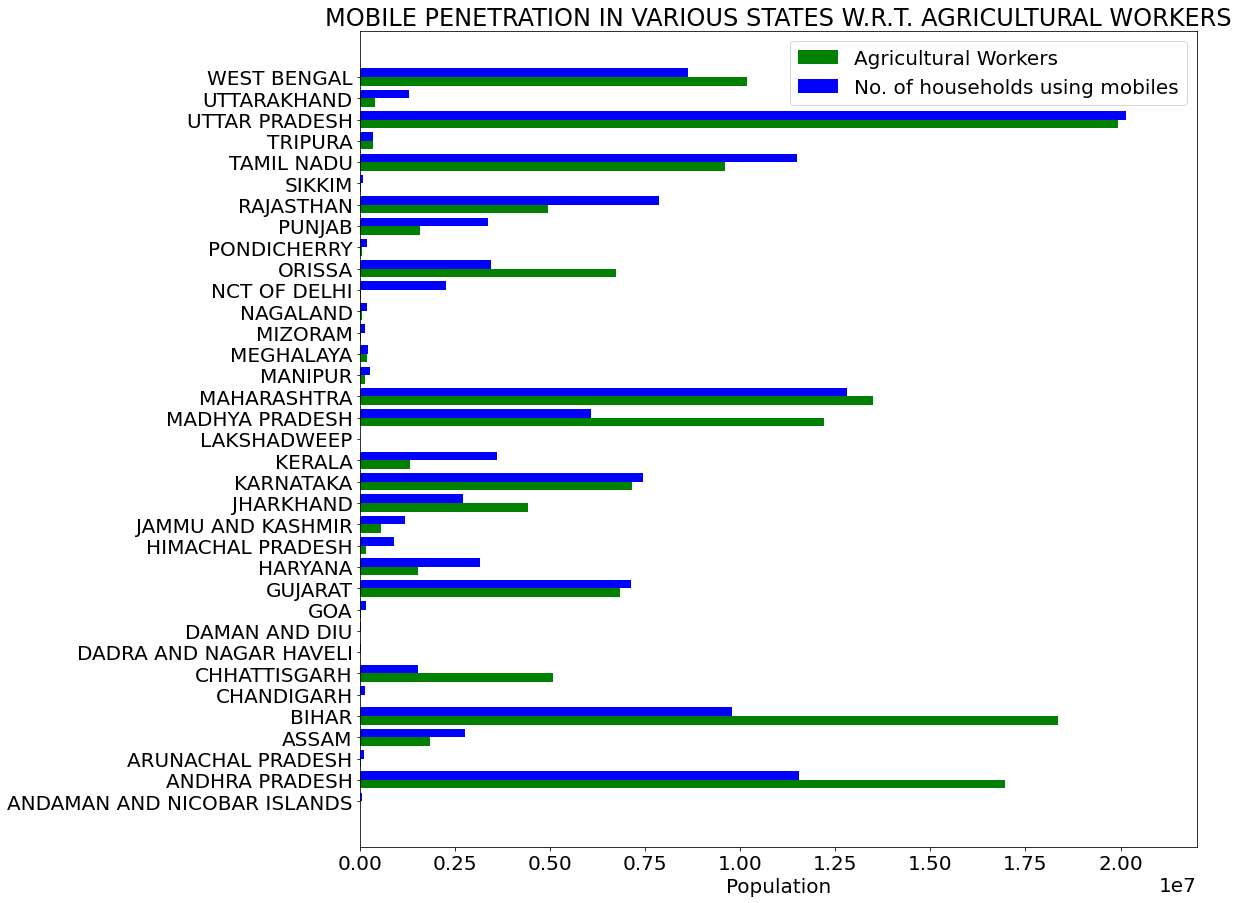

In [ ]:
from numpy import *
ind = arange(35) # provide with evenly spaced arrays
width = 0.4

fig, ax = plt.subplots()
plt.xlim(0,22000000) # set the limits of the current x axes
rects1 = ax.barh(ind, df_mobile_penetration['agri_workers'],width,color='g',align='center')
rects2 = ax.barh(ind+width, df_mobile_penetration['Households_with_mobile'],width,color='b',align='center')
ax.set_xlabel('Population')
ax.set_title('MOBILE PENETRATION IN VARIOUS STATES W.R.T. AGRICULTURAL WORKERS')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels((x for x in df_mobile_penetration['state']))
ax.legend((rects1[0], rects2[0]), ('Agricultural Workers', 'No. of households using mobiles'))
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20,20)
plt.show()